# Population and Sample

In [30]:
import pandas as pd
import numpy as np

In [31]:
# Example population data

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [32]:
a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

3    20
7    16
1    48
3    20
4    19
Name: Population, dtype: int64


In [33]:
a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

5    13
3    20
0    47
8    50
2    85
Name: Population, dtype: int64


In [34]:
# Calculate mean and variance
population_mean = data['Population'].mean()
population_var = data['Population'].var(ddof=0)
print('Population mean is ', population_mean)
print('Population variance is', population_var)

Population mean is  43.0
Population variance is 571.8


In [35]:
# Calculate sample mean and sample standard deviation, size =10

a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  32.2
Sample variance is 510.1777777777777


### Average of an unbiased estimator

In [36]:
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

## Variation of Sample

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [38]:
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  9.783845238690528
sample SD is  5.559435395414396


## Empirical Distribution of Mean

In [39]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [40]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

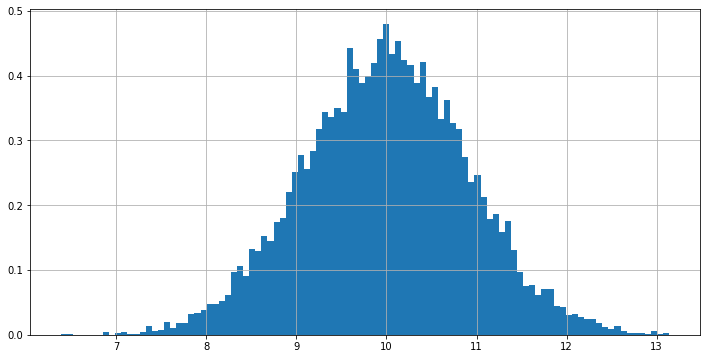

In [41]:
collection['meanlist'].hist(bins=100, density=1,figsize=(12,6))

## Sampling from Arbitary Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D1EB07108>]],
      dtype=object)

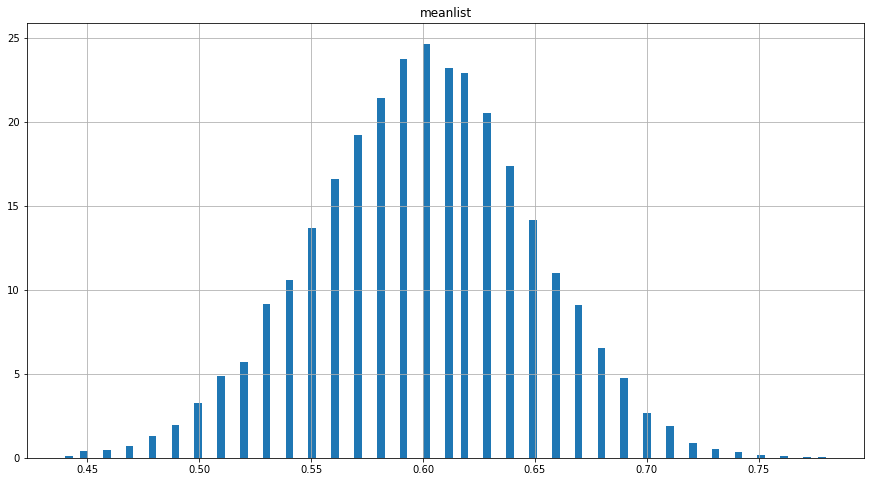

In [42]:
# According to CLT, if sample size is large enough the distribution of sample mean is approx normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, density=1,figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D1EE954C8>]],
      dtype=object)

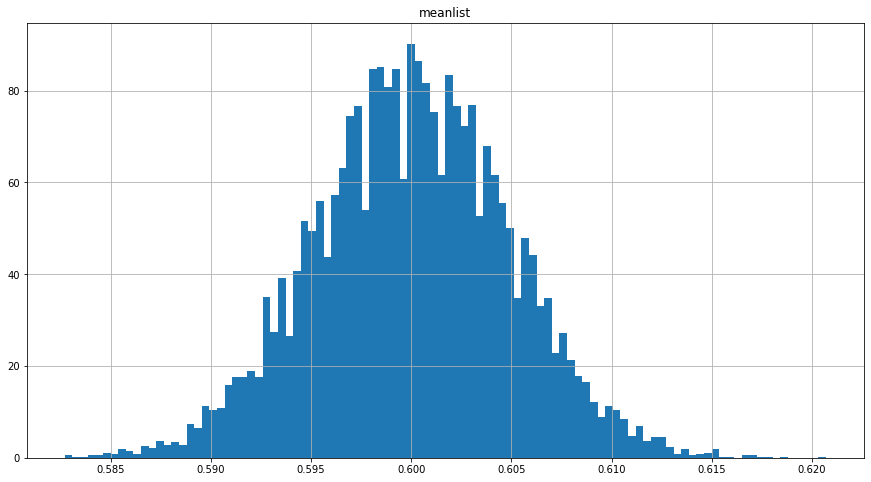

In [46]:
# distribution tends to normal on increasing the sample size
sample_size = 10000
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, density=1,figsize=(15,8))

In [47]:
from scipy.stats import norm

In [48]:
ms = pd.read_csv('microsoft.csv',index_col = 0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Estimate the average stock return with 90% Confidence Interval

In [51]:
# Average stock return of microsoft using log return
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [52]:
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [53]:
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.00016900921195778804, 0.0014714537602882566)


# Hypothesis Testing

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
ms = pd.read_csv('microsoft.csv', index_col = 0)
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

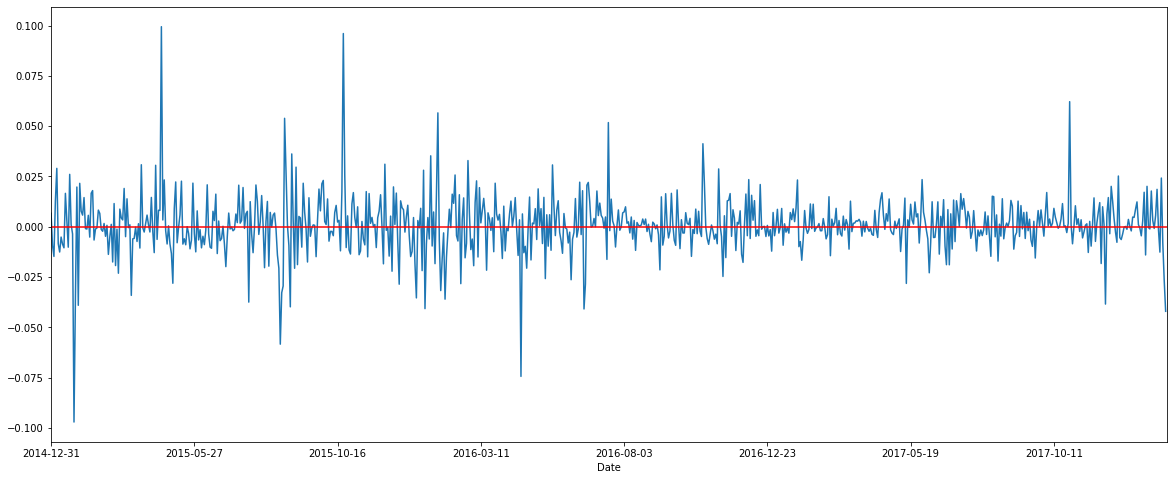

In [57]:
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

# The below plot shows how the log return goes up and down during the period

## Testing a claim by Hypothesis testing

In [59]:
# Calculating test statistics

sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


In [60]:
# Set decision criteria

alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [61]:
# Making decision, whether H0 should be rejected ?
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))


At significant level of 0.05, shall we reject: False


## Alternate Way: p-Value method

In [62]:
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [63]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))


At significant level of 0.05, shall we reject: False
